In [7]:
!pip install pandas matplotlib seaborn scikit-learn nltk imbalanced-learn --quiet


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
df = pd.read_csv('/content/amazon_reviews_multi_en.csv', on_bad_lines='skip')  # For newer Pandas
# or
# df = pd.read_csv('/content/amazon_reviews_multi_en.csv', error_bad_lines=False)  # For older versions


In [10]:
df.info()
df.columns
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200000 non-null  object
 1   text    200000 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


,0
id,0
text,0


In [11]:
df.isnull().sum()


,0
id,0
text,0


In [12]:
import pandas as pd

df = pd.read_csv('amazon_reviews_multi_en.csv')
df.head()


,id,text
0,en_0964290,I'll spend twice the amount of time boxing up ...
1,en_0690095,Not use able\n\nthe cabinet dot were all detac...
2,en_0311558,The product is junk.\n\nI received my first or...
3,en_0044972,Fucking waste of money\n\nThis product is a pi...
4,en_0784379,bubble\n\nwent through 3 in one day doesn't fi...


In [13]:
df.isnull().sum()


,0
id,0
text,0


In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and digits
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,I'll spend twice the amount of time boxing up ...,ill spend twice amount time boxing whole usele...
1,Not use able\n\nthe cabinet dot were all detac...,use able cabinet dot detached backing got
2,The product is junk.\n\nI received my first or...,product junk received first order product brok...
3,Fucking waste of money\n\nThis product is a pi...,fucking waste money product piece shit buy doe...
4,bubble\n\nwent through 3 in one day doesn't fi...,bubble went one day doesnt fit correct couldnt...


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each sentiment
sns.countplot(data=df, x='label', palette='Set2')


# Customize the plot
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


ValueError: Could not interpret value `label` for `x`. An entry with this name does not appear in `data`.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(df['cleaned_text'])  # Features (text)
y = df['label']  # Target labels (0 to 4)


In [18]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset (replace path if needed)
df = pd.read_csv('amazon_reviews_multi_en.csv')

# Preview
df.head()

# Clean the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)         # remove non-letters
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra whitespace
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

df[['text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,I'll spend twice the amount of time boxing up ...,ill spend twice amount time boxing whole usele...
1,Not use able\n\nthe cabinet dot were all detac...,use able cabinet dot detached backing got
2,The product is junk.\n\nI received my first or...,product junk received first order product brok...
3,Fucking waste of money\n\nThis product is a pi...,fucking waste money product piece shit buy doe...
4,bubble\n\nwent through 3 in one day doesn't fi...,bubble went one day doesnt fit correct couldnt...


In [19]:
!pip install transformers --quiet


In [21]:
from transformers import pipeline

# Load the pretrained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [22]:
from tqdm import tqdm

# Use tqdm for progress tracking
tqdm.pandas()

batch_size = 32
results = []

for i in tqdm(range(0, len(df), batch_size)):
    batch = df['text'][i:i+batch_size].tolist()
    result = sentiment_pipeline(batch, truncation=True)
    results.extend(result)

# Attach results to DataFrame
df = df.iloc[:len(results)]  # trim to match
df['sentiment_result'] = results

# Convert to numeric label
def convert_label(res):
    if res['label'] == 'POSITIVE':
        return 2
    elif res['label'] == 'NEGATIVE':
        return 0
    else:
        return 1

df['label'] = df['sentiment_result'].apply(convert_label)


100%|██████████| 6250/6250 [17:09<00:00,  6.07it/s]
<ipython-input-22-04f3328317cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_result'] = results


<ipython-input-23-6ff9f2f16f97>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


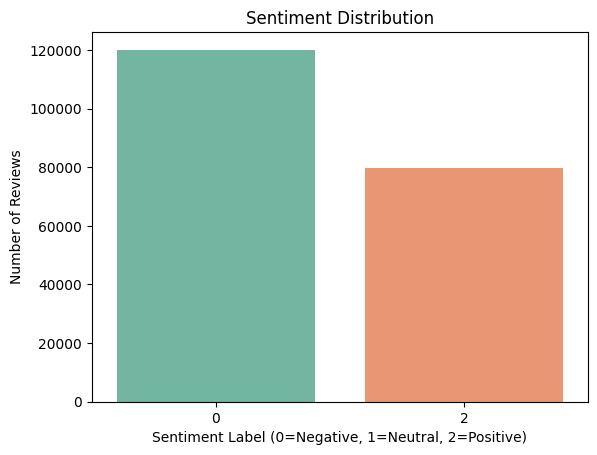

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label (0=Negative, 1=Neutral, 2=Positive)')
plt.ylabel('Number of Reviews')
plt.show()


In [24]:
# View a few positive samples
print("Positive examples:\n")
print(df[df['label'] == 2]['text'].sample(5).values)

# View a few negative samples
print("\nNegative examples:\n")
print(df[df['label'] == 0]['text'].sample(5).values)


Positive examples:

['Four Stars\n\nHappy with the purchase.'
 'Good value\n\nA little hard to adjust. But works as expected'
 'Gets job done\n\nThey plastic seemed to stretch. Doesn’t allow to form complete balls but it’s still ok.'
 'Nice fabric, but sizes are wrong\n\nThis outfit does not fit well, it is too small. The fabric is very nice though and would look good if it fit better'
 "Keep looking.\n\nI was expecting it to be a bit more sturdy for $20. I'll be surprised if it lasts a year without tearing."]

Negative examples:

['Issues\n\nThe end popped off this hose. I’ve never had that happen before. Screwed an adjustable head on and when I turned on the water, pop goes the brass head. Could be a fun game to scare the crap out of someone, which is why I gave it three stars, otherwise would’ve given this a one star.'
 "Not good\n\nThis is awful. It has good ingredients but really affected my eyes. My contacts felt blurry after a couple hours and I had to take them out as soon as I

In [25]:
from sklearn.model_selection import train_test_split

X = df['text']         # Input = raw review text
y = df['label']        # Output = sentiment label (0, 1, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit on train, transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(
    y_test, y_pred,
    labels=[0, 1, 2],
    target_names=["Negative", "Neutral", "Positive"]
))


              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87     24134
     Neutral       0.00      0.00      0.00         0
    Positive       0.82      0.78      0.80     15866

    accuracy                           0.84     40000
   macro avg       0.56      0.56      0.56     40000
weighted avg       0.84      0.84      0.84     40000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

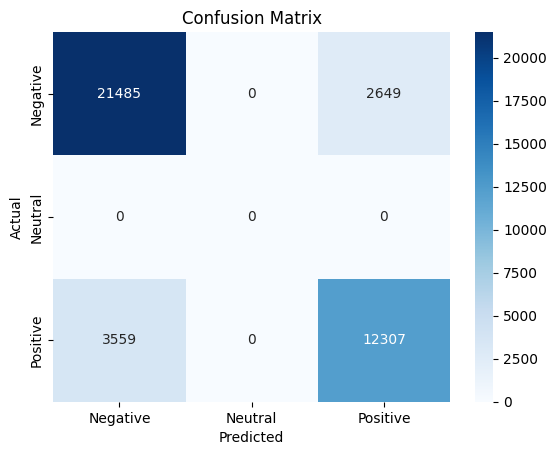

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report safely
print(classification_report(
    y_test,
    y_pred,
    labels=[0, 1, 2],  # explicitly define all possible classes
    target_names=["Negative", "Neutral", "Positive"]
))


              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87     24134
     Neutral       0.00      0.00      0.00         0
    Positive       0.82      0.78      0.80     15866

    accuracy                           0.84     40000
   macro avg       0.56      0.56      0.56     40000
weighted avg       0.84      0.84      0.84     40000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

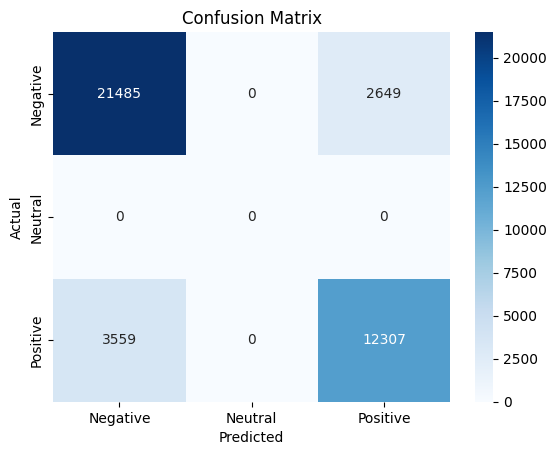

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
print("SVM Accuracy:", svm_model.score(X_test_tfidf, y_test))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
print("Naive Bayes Accuracy:", nb_model.score(X_test_tfidf, y_test))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
print("Random Forest Accuracy:", rf_model.score(X_test_tfidf, y_test))


SVM Accuracy: 0.8389
Naive Bayes Accuracy: 0.816925


KeyboardInterrupt: 

In [36]:
from sklearn.svm import LinearSVC

# Create and train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)


LinearSVC()

In [37]:
def predict_sentiment_svm(text):
    vec = vectorizer.transform([text])
    pred = svm_model.predict(vec)[0]
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[pred]


In [38]:
# Try examples
print(predict_sentiment_svm("Amazing performance and great value for money!"))
print(predict_sentiment_svm("The worst thing I ever bought."))
print(predict_sentiment_svm("Product is okay, nothing special."))


Positive
Negative
Negative


In [45]:
text = input("Enter a product review: ")
print("Predicted Sentiment (SVM):", predict_sentiment_svm(text))


Enter a product review: not satisfied
Predicted Sentiment (SVM): Positive


In [46]:
!pip install transformers


In [47]:
from transformers import pipeline

# Load sentiment analysis pipeline (BERT behind the scenes)
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [48]:
print(sentiment_pipeline("This product is amazing!"))
print(sentiment_pipeline("Worst experience ever."))
print(sentiment_pipeline("Not satisfied at all."))


[{'label': 'POSITIVE', 'score': 0.9998860359191895}]
[{'label': 'NEGATIVE', 'score': 0.9997876286506653}]
[{'label': 'NEGATIVE', 'score': 0.9997885823249817}]


In [49]:
from tqdm import tqdm

batch_size = 32
results = []

for i in tqdm(range(0, len(df), batch_size)):
    batch = df['text'][i:i+batch_size].tolist()
    preds = sentiment_pipeline(batch, truncation=True)
    results.extend(preds)

df = df.iloc[:len(results)]  # Make sure lengths match
df['sentiment'] = [res['label'] for res in results]


100%|██████████| 6250/6250 [17:31<00:00,  5.94it/s]
<ipython-input-49-c12beaaea729>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = [res['label'] for res in results]


In [50]:
def convert_label(label):
    if label == 'POSITIVE':
        return 2
    elif label == 'NEGATIVE':
        return 0
    else:
        return 1  # for NEUTRAL if it ever appears

df['label'] = df['sentiment'].apply(convert_label)


<ipython-input-51-31e6c8f9bb94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


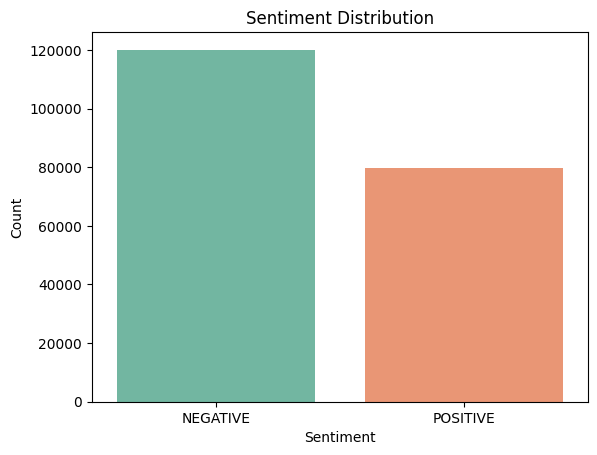

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [53]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87     24134
    Positive       0.82      0.78      0.80     15866

    accuracy                           0.84     40000
   macro avg       0.84      0.83      0.84     40000
weighted avg       0.84      0.84      0.84     40000



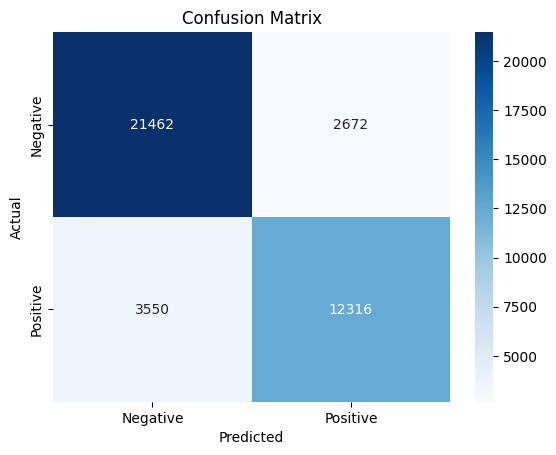

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Dynamically get unique labels and map to text
unique_labels = sorted(df['label'].unique())  # e.g., [0, 2]
label_names = {0: "Negative", 1: "Neutral", 2: "Positive"}
target_names = [label_names[i] for i in unique_labels]

# Evaluate
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [56]:
def predict_sentiment(text):
    vec = vectorizer.transform([text])
    pred = logreg_model.predict(vec)[0]
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[pred]

# Test
print(predict_sentiment("not satisfied with the product"))
print(predict_sentiment("really good value for the price"))


Positive
Positive


In [57]:
def predict_sentiment(text):
    # Preprocess and vectorize input text
    vec = vectorizer.transform([text])

    # Predict the label
    pred = logreg_model.predict(vec)[0]

    # Map numeric label to text
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[pred]



In [58]:
print(predict_sentiment("The product is amazing!"))
print(predict_sentiment("I am not satisfied"))
print(predict_sentiment("It's okay, not too bad"))


Positive
Positive
Negative


In [59]:
# Loop for user input
while True:
    user_input = input("Enter a comment (or type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        break
    print("Predicted Sentiment:", predict_sentiment(user_input))
    print()


Enter a comment (or type 'exit' to stop): bad
Predicted Sentiment: Negative

Enter a comment (or type 'exit' to stop): good
Predicted Sentiment: Positive

Enter a comment (or type 'exit' to stop): best
Predicted Sentiment: Positive

Enter a comment (or type 'exit' to stop): nost stisfied
Predicted Sentiment: Negative

Enter a comment (or type 'exit' to stop): better quality
Predicted Sentiment: Negative

Enter a comment (or type 'exit' to stop): best product
Predicted Sentiment: Positive

Enter a comment (or type 'exit' to stop): may be more durable
Predicted Sentiment: Positive

Enter a comment (or type 'exit' to stop): easily breaking
Predicted Sentiment: Negative

Enter a comment (or type 'exit' to stop): exit


In [60]:
import joblib

# Save vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save model
joblib.dump(logreg_model, 'sentiment_model.pkl')


['sentiment_model.pkl']

In [61]:
# Load saved vectorizer and model
import joblib

vectorizer = joblib.load('tfidf_vectorizer.pkl')
logreg_model = joblib.load('sentiment_model.pkl')

# Function to predict
def predict_sentiment(text):
    vec = vectorizer.transform([text])
    pred = logreg_model.predict(vec)[0]
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[pred]

# Try it
print(predict_sentiment("This product is awful"))


Negative


In [62]:
from google.colab import files
files.download('tfidf_vectorizer.pkl')
files.download('sentiment_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>